### Autoencoders

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

4423680/4422102 [==============================] - 0s 0us/step
9


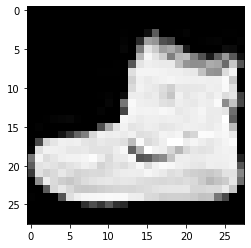

In [120]:
mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_labels[0])
plt.imshow(train_images[0], cmap='Greys_r')
# data = MNISTDataset(train_images.reshape([-1, 784]), train_labels, test_images.reshape([-1, 784]), test_labels, batch_size=128)
train_images = train_images.reshape([-1, 784])
train_images = train_images.astype(np.float32)/255
test_images = test_images.reshape([-1, 784])
test_images = test_images.astype(np.float32)/255

train_labels = train_labels.astype(np.int32)
test_labels = test_labels.astype(np.int32)

In [121]:
inputs = tf.keras.layers.Input(shape= (784,))
dense = tf.keras.layers.Dense(64, activation= 'relu')(inputs)
x = tf.keras.layers.Dense(64, activation= 'relu')(dense)
encoder_out = tf.keras.layers.Dense(10)(x)

encoder = tf.keras.Model(inputs, encoder_out, name= 'Encoder')
encoder.summary()

x = tf.keras.layers.Dense(64, activation= 'relu')(encoder_out)
x = tf.keras.layers.Dense(64, activation= 'relu')(x)
decoder_out = tf.keras.layers.Dense(784)(x)

autoencoder = tf.keras.Model(inputs, decoder_out, name= 'Autoencoder')
autoencoder.summary()

Model: "Encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_49 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_172 (Dense)            (None, 64)                50240     
_________________________________________________________________
dense_173 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_174 (Dense)            (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Model: "Autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_49 (InputLayer)        [(None, 784)]             0         
__________________________________

In [122]:
autoencoder.compile(loss= tf.keras.losses.MeanSquaredError(), optimizer= tf.keras.optimizers.RMSprop(), metrics= ['accuracy'])
history = autoencoder.fit(train_images, train_images, batch_size=64, epochs=5, validation_split= 0.2)
test_scores = autoencoder.evaluate(test_images, test_images, verbose= 2)

Epoch 1/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0344 - accuracy: 0.0091 - val_loss: 0.0251 - val_accuracy: 0.0131
Epoch 2/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0239 - accuracy: 0.0143 - val_loss: 0.0225 - val_accuracy: 0.0116
Epoch 3/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0216 - accuracy: 0.0135 - val_loss: 0.0215 - val_accuracy: 0.0109
Epoch 4/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0204 - accuracy: 0.0144 - val_loss: 0.0194 - val_accuracy: 0.0152
Epoch 5/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0196 - accuracy: 0.0147 - val_loss: 0.0193 - val_accuracy: 0.0129
313/313 - 0s - loss: 0.0192 - accuracy: 0.0130


In [123]:
autoencoder.compile(loss= tf.keras.losses.CategoricalCrossentropy(from_logits= True), optimizer= tf.keras.optimizers.RMSprop(), metrics= ['accuracy'])
history = autoencoder.fit(train_images, train_images, batch_size=64, epochs=5, validation_split= 0.2)

Epoch 1/5
750/750 [==============================] - 3s 5ms/step - loss: 4631627776.0000 - accuracy: 0.0017 - val_loss: 25932478464.0000 - val_accuracy: 8.3333e-04
Epoch 2/5
750/750 [==============================] - 3s 5ms/step - loss: 240645898240.0000 - accuracy: 0.0017 - val_loss: 739427942400.0000 - val_accuracy: 0.0014
Epoch 3/5
750/750 [==============================] - 3s 4ms/step - loss: 2631681441792.0000 - accuracy: 0.0014 - val_loss: 6046009524224.0000 - val_accuracy: 0.0035
Epoch 4/5
750/750 [==============================] - 3s 5ms/step - loss: 14702218313728.0000 - accuracy: 0.0018 - val_loss: 28906612588544.0000 - val_accuracy: 2.5000e-04
Epoch 5/5
750/750 [==============================] - 3s 5ms/step - loss: 56778930782208.0000 - accuracy: 0.0016 - val_loss: 98444542738432.0000 - val_accuracy: 9.1667e-04


### CONVOLUTIONAL AUTOENCODERS

In [ ]:
mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# train_images = train_images.reshape([-1, 784])
train_images = train_images.astype(np.float32)/255
# test_images = test_images.reshape([-1, 784])
test_images = test_images.astype(np.float32)/255

train_labels = train_labels.astype(np.int32)
test_labels = test_labels.astype(np.int32)

In [125]:
enc_inp = tf.keras.layers.Input([28,28,1])
x = tf.keras.layers.Conv2D(28, 3, activation= 'relu')(enc_inp)
x = tf.keras.layers.MaxPool2D(2)(x)
x = tf.keras.layers.Conv2D(56, 3, activation= 'relu')(x)
x = tf.keras.layers.MaxPool2D(2)(x)
x = tf.keras.layers.Conv2D(25, 3, activation= 'relu')(x)
# x = tf.keras.layers.Flatten()(x)
# x = tf.keras.layers.Dense(100, activation= 'relu')(x)
# x = tf.keras.layers.Dense(100)(x)
enc_out = tf.keras.layers.GlobalMaxPooling2D()(x)

encoder = tf.keras.Model(enc_inp, enc_out, name= 'Conv_Encoder')
encoder.summary()

decod_inp = tf.keras.layers.Input(shape= (25,))
x = tf.keras.layers.Reshape((5,5,1))(decod_inp)
x = tf.keras.layers.Conv2DTranspose(28, 3, activation= 'relu')(x)
x = tf.keras.layers.Conv2DTranspose(56, 3, activation= 'relu')(x)
x = tf.keras.layers.UpSampling2D(3)(x)
# x = tf.keras.layers.Conv2DTranspose(28, 3, activation= 'relu')(x)
decod_out = tf.keras.layers.Conv2DTranspose(1, 2, activation= 'relu')(x)

decoder = tf.keras.Model(decod_inp, decod_out, name= 'Conv_Decoder')
decoder.summary()

autoencoder_inp = tf.keras.Input([28, 28, 1])
encoded_inp = encoder(autoencoder_inp)
decoded_inp = decoder(encoded_inp)
conv_autoencoder = tf.keras.Model(autoencoder_inp, decoded_inp, name= 'Conv_Autoencoder')
conv_autoencoder.summary()

Model: "Conv_Encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_50 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 11, 11, 56)        14168     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 5, 5, 56)          0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 3, 3, 25)          12625     
_________________________________________________________________
global_max_pooling2d_14 (Glo (None, 25)               

In [126]:
conv_autoencoder.compile(loss= tf.keras.losses.MeanSquaredError(), optimizer= tf.keras.optimizers.RMSprop(), metrics= ['accuracy'])
history = conv_autoencoder.fit(train_images, train_images, batch_size=64, epochs=5, validation_split= 0.2)
autoencoder_out = conv_autoencoder.predict(test_images)

Epoch 1/5
750/750 [==============================] - 65s 87ms/step - loss: 0.0479 - accuracy: 0.4958 - val_loss: 0.0348 - val_accuracy: 0.4954
Epoch 2/5
750/750 [==============================] - 66s 88ms/step - loss: 0.0345 - accuracy: 0.4995 - val_loss: 0.0323 - val_accuracy: 0.4946
Epoch 3/5
750/750 [==============================] - 65s 87ms/step - loss: 0.0313 - accuracy: 0.5005 - val_loss: 0.0304 - val_accuracy: 0.5013
Epoch 4/5
750/750 [==============================] - 65s 87ms/step - loss: 0.0296 - accuracy: 0.5013 - val_loss: 0.0291 - val_accuracy: 0.5014
Epoch 5/5
750/750 [==============================] - 65s 87ms/step - loss: 0.0285 - accuracy: 0.5017 - val_loss: 0.0284 - val_accuracy: 0.4967


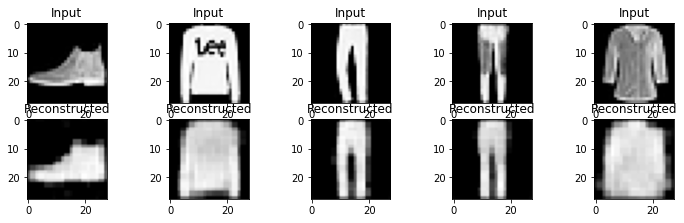

In [127]:
plt.figure(figsize=(25,5))
for i in range (5):
  raw_input = plt.subplot(3,10, i+1)
  imgplot = plt.imshow(test_images[i], cmap="Greys_r")
  raw_input.set_title('Input')

  decoded = plt.subplot(3, 10, i+1+10)
  imgplot = plt.imshow(autoencoder_out[i].reshape(28,28), cmap="Greys_r")
  decoded.set_title('Reconstructed')


## *What do Autoencoders Learn?*

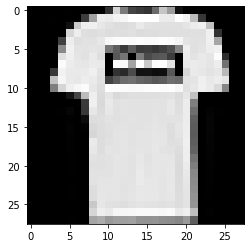

In [128]:
mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

plt.imshow(train_images[1], cmap="Greys_r")

train_images = train_images[1].astype('float32')/255
test_images = test_images.astype('float32')/255
train_images = train_images.reshape([-1, 784])
test_images = test_images.reshape([-1, 784])

In [ ]:
def dynamic_model(x):
  model.add(tf.keras.layers.Dense(x,activation='relu'))


In [130]:
decoded_image=[]
dims =784
for i in range (10):
  dims =784
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(784, input_shape=(784,)))
  for j in range(i):
    if(j<=5):
      # dims-=20
      dynamic_model(dims/2)
    else:
      # dims+=50
      dynamic_model(dims*2)
  model.add(tf.keras.layers.Dense(784,activation='relu'))
  model.compile()

  decoded_image.append(model(train_images))


decoded_image_final=[]
for i in range(10):
  decoded_image_final.append(tf.reshape(decoded_image[i],[28,28]))
model.summary()


Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_232 (Dense)            (None, 784)               615440    
_________________________________________________________________
dense_233 (Dense)            (None, 392)               307720    
_________________________________________________________________
dense_234 (Dense)            (None, 392)               154056    
_________________________________________________________________
dense_235 (Dense)            (None, 392)               154056    
_________________________________________________________________
dense_236 (Dense)            (None, 392)               154056    
_________________________________________________________________
dense_237 (Dense)            (None, 392)               154056    
_________________________________________________________________
dense_238 (Dense)            (None, 392)             

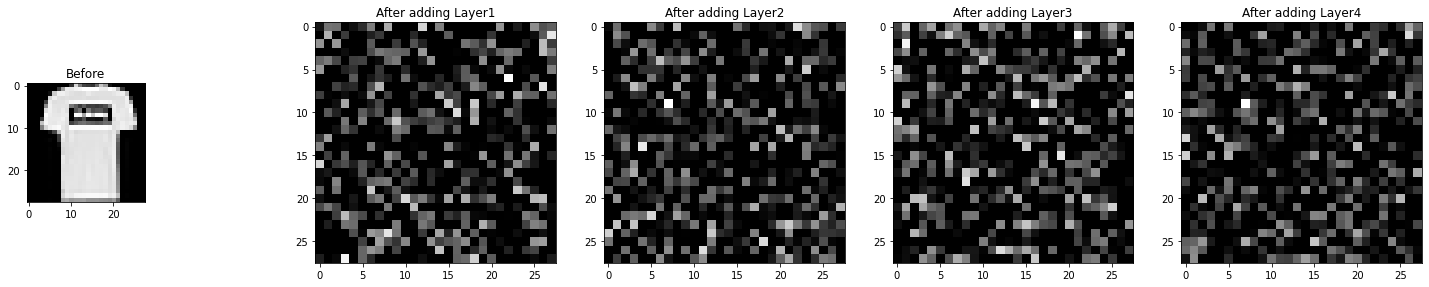

In [131]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(25,10))
raw_input = plt.subplot(1,10, 1)
imgplot = plt.imshow(train_images.reshape(28, 28), cmap="Greys_r")
raw_input.set_title('Before')

for i in range (1,5):
  decoded = plt.subplot(1, 5, i+1)
  imgplot = plt.imshow(decoded_image_final[i], cmap="Greys_r")
  decoded.set_title('After adding Layer'+str(i))

## *Unsupervised Pretraining*

tf.Tensor([60000   784], shape=(2,), dtype=int32)
tf.Tensor([122 784], shape=(2,), dtype=int32)


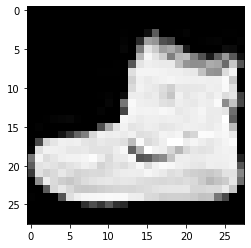

In [132]:
mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

plt.imshow(train_images[0], cmap="Greys_r")

train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255
train_images = train_images.reshape([-1, 784])
test_images = test_images.reshape([-1, 784])
print(tf.shape(train_images))

random = tf.random.uniform([],minval=100,maxval=300,dtype=tf.int32)


train_images_subset=train_images[:random.numpy()]
print(tf.shape(train_images_subset))
train_labels_subset=train_labels[:random.numpy()]

### *Train autoencoder – freeze encoder – train classifier on top*

In [133]:
inputs = tf.keras.Input(shape=(784,), name='digits')
x1 = tf.keras.layers.Dense(512, activation='relu', name='dense_1')(inputs)
x2 = tf.keras.layers.Dense(256, activation='relu', name='dense_2')(x1)
x3 = tf.keras.layers.Dense(128, activation='relu', name='dense_3')(x2)
x4 = tf.keras.layers.Dense(64, activation='relu', name='dense_4')(x3)
x5 = tf.keras.layers.Dense(32, activation='relu', name='dense_5')(x4)
x6 = tf.keras.layers.Dense(32, activation='relu', name='dense_6')(x5)
x7 = tf.keras.layers.Dense(64, activation='relu', name='dense_7')(x6)
x8 = tf.keras.layers.Dense(128, activation='relu', name='dense_8')(x7)
x9 = tf.keras.layers.Dense(256, activation='relu', name='dense_9')(x8)
x10 = tf.keras.layers.Dense(512, activation='relu', name='encoder')(x9)

encoder0 = tf.keras.Model(inputs=inputs, outputs=x10,name='Encoder')
# encoder0.summary()
inputs_d = tf.keras.Input(shape=(512,), name='encoded_digits')
decode = tf.keras.layers.Dense(784, activation='relu', name='dense_1')(inputs_d)
decoder0 = tf.keras.Model(inputs = inputs_d,outputs = decode,name='Decoder')
# decoder0.summary()
autoencoder0 = tf.keras.Model(inputs = inputs, outputs = decoder0(encoder0(inputs)),name = 'AutoEncoder')
# autoencoder0.summary()

autoencoder0.compile(optimizer= tf.keras.optimizers.RMSprop(1e-3),loss = tf.keras.losses.MeanSquaredError())
autoencoder0.fit(train_images,train_images,batch_size=64,epochs=5)


Epoch 1/5
938/938 [==============================] - 21s 22ms/step - loss: 0.0522
Epoch 2/5
938/938 [==============================] - 19s 20ms/step - loss: 0.0279
Epoch 3/5
938/938 [==============================] - 18s 19ms/step - loss: 0.0241
Epoch 4/5
938/938 [==============================] - 18s 19ms/step - loss: 0.0218
Epoch 5/5
938/938 [==============================] - 18s 19ms/step - loss: 0.0200


In [134]:
inputs_c = tf.keras.Input(shape=(512,), name='encoded__classified_digits')
c1 = tf.keras.layers.Dense(256, activation='relu', name='dense_1_c')(inputs_c)
c2 = tf.keras.layers.Dense(10, activation='relu', name='dense_2_c')(c1)
classifier0 = tf.keras.Model(inputs=inputs_c,outputs=c2)
# classifier.summary()
encoder0.trainable=False # freezing the encoder weights 

encoder_classifier0=tf.keras.Model(inputs=inputs,outputs=classifier0(encoder0(inputs)),name='EC')
encoder_classifier0.compile(optimizer= tf.keras.optimizers.RMSprop(1e-3),loss = tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['sparse_categorical_accuracy'])
# encoder_classifier0.summary()
encoder_classifier0.fit(train_images_subset,train_labels_subset,batch_size=20,epochs=5)

Epoch 1/5
7/7 [==============================] - 0s 5ms/step - loss: 5.1598 - sparse_categorical_accuracy: 0.2705
Epoch 2/5
7/7 [==============================] - 0s 4ms/step - loss: 1.7705 - sparse_categorical_accuracy: 0.3607
Epoch 3/5
7/7 [==============================] - 0s 4ms/step - loss: 1.7175 - sparse_categorical_accuracy: 0.3607
Epoch 4/5
7/7 [==============================] - 0s 4ms/step - loss: 1.7175 - sparse_categorical_accuracy: 0.3607
Epoch 5/5
7/7 [==============================] - 0s 4ms/step - loss: 1.7175 - sparse_categorical_accuracy: 0.3607


In [135]:
results = encoder_classifier0.evaluate(test_images, test_labels)
print('test loss, test acc:', results)

313/313 [==============================] - 1s 3ms/step - loss: 2.1834 - sparse_categorical_accuracy: 0.2836
test loss, test acc: [2.1833648681640625, 0.28360000252723694]


### *Train autoencoder – train classifier on top of encoder. Do not freeze the encoder, i.e. the encoder is “fine-tuned” on the labeled subset of data as well.*

In [136]:
inputs = tf.keras.Input(shape=(784,), name='digits')
x1 = tf.keras.layers.Dense(512, activation='relu', name='dense_1')(inputs)
x2 = tf.keras.layers.Dense(256, activation='relu', name='dense_2')(x1)
x3 = tf.keras.layers.Dense(128, activation='relu', name='dense_3')(x2)
x4 = tf.keras.layers.Dense(64, activation='relu', name='dense_4')(x3)
x5 = tf.keras.layers.Dense(32, activation='relu', name='dense_5')(x4)
x6 = tf.keras.layers.Dense(32, activation='relu', name='dense_6')(x5)
x7 = tf.keras.layers.Dense(64, activation='relu', name='dense_7')(x6)
x8 = tf.keras.layers.Dense(128, activation='relu', name='dense_8')(x7)
x9 = tf.keras.layers.Dense(256, activation='relu', name='dense_9')(x8)
x10 = tf.keras.layers.Dense(512, activation='relu', name='encoder')(x9)

encoder = tf.keras.Model(inputs=inputs, outputs=x10,name='Encoder')
# encoder.summary()
inputs_d = tf.keras.Input(shape=(512,), name='encoded_digits')
decode = tf.keras.layers.Dense(784, activation='relu', name='dense_1')(inputs_d)
decoder = tf.keras.Model(inputs = inputs_d,outputs = decode,name='Decoder')
# decoder.summary()
autoencoder = tf.keras.Model(inputs = inputs, outputs = decoder(encoder(inputs)),name = 'AutoEncoder')
# autoencoder.summary()

autoencoder.compile(optimizer= tf.keras.optimizers.RMSprop(1e-3),loss = tf.keras.losses.MeanSquaredError())
autoencoder.fit(train_images,train_images,batch_size=64,epochs=5)

Epoch 1/5
938/938 [==============================] - 18s 19ms/step - loss: 0.0508
Epoch 2/5
938/938 [==============================] - 18s 19ms/step - loss: 0.0289
Epoch 3/5
938/938 [==============================] - 18s 20ms/step - loss: 0.0244
Epoch 4/5
938/938 [==============================] - 18s 19ms/step - loss: 0.0220
Epoch 5/5
938/938 [==============================] - 18s 19ms/step - loss: 0.0206


In [137]:
inputs_c = tf.keras.Input(shape=(512,), name='encoded__classified_digits')
c1 = tf.keras.layers.Dense(256, activation='relu', name='dense_1_c')(inputs_c)
c2 = tf.keras.layers.Dense(10, activation='relu', name='dense_2_c')(c1)
classifier = tf.keras.Model(inputs=inputs_c,outputs=c2)
# classifier.summary()

encoder_classifier=tf.keras.Model(inputs=inputs,outputs=classifier(encoder(inputs)),name='EC')
encoder_classifier.compile(optimizer= tf.keras.optimizers.RMSprop(1e-3),loss = tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['sparse_categorical_accuracy'])
# encoder_classifier.summary()
encoder_classifier.fit(train_images_subset,train_labels_subset,batch_size=64,epochs=5)


Epoch 1/5
2/2 [==============================] - 0s 13ms/step - loss: 6.4043 - sparse_categorical_accuracy: 0.2623
Epoch 2/5
2/2 [==============================] - 0s 9ms/step - loss: 2.8736 - sparse_categorical_accuracy: 0.7049
Epoch 3/5
2/2 [==============================] - 0s 8ms/step - loss: 1.6024 - sparse_categorical_accuracy: 0.7377
Epoch 4/5
2/2 [==============================] - 0s 9ms/step - loss: 2.5644 - sparse_categorical_accuracy: 0.6557
Epoch 5/5
2/2 [==============================] - 0s 9ms/step - loss: 1.3671 - sparse_categorical_accuracy: 0.5984


In [138]:
results = encoder_classifier.evaluate(test_images, test_labels)
print('test loss, test acc:', results)

313/313 [==============================] - 1s 3ms/step - loss: 2.0251 - sparse_categorical_accuracy: 0.3799
test loss, test acc: [2.0251238346099854, 0.3799000084400177]


### *Train a classifier directly on the labeled subset; no pretraining. For fairness, it should have the same architecture as the encoder + classifier above.*

In [139]:
inputs = tf.keras.Input(shape=(784,), name='digits')
x1 = tf.keras.layers.Dense(512, activation='relu', name='dense_1')(inputs)
x2 = tf.keras.layers.Dense(256, activation='relu', name='dense_2')(x1)
x3 = tf.keras.layers.Dense(128, activation='relu', name='dense_3')(x2)
x4 = tf.keras.layers.Dense(64, activation='relu', name='dense_4')(x3)
x5 = tf.keras.layers.Dense(32, activation='relu', name='dense_5')(x4)
x6 = tf.keras.layers.Dense(32, activation='relu', name='dense_6')(x5)
x7 = tf.keras.layers.Dense(64, activation='relu', name='dense_7')(x6)
x8 = tf.keras.layers.Dense(128, activation='relu', name='dense_8')(x7)
x9 = tf.keras.layers.Dense(256, activation='relu', name='dense_9')(x8)
x10 = tf.keras.layers.Dense(512, activation='relu', name='encoder')(x9)

encoder2 = tf.keras.Model(inputs=inputs, outputs=x10,name='Encoder2')
encoder2.summary()

Model: "Encoder2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
digits (InputLayer)          [(None, 784)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                105

In [140]:
inputs_c2 = tf.keras.Input(shape=(512,), name='encoded__classified_digits')
c1 = tf.keras.layers.Dense(256, activation='relu', name='dense_1_c')(inputs_c2)
c2 = tf.keras.layers.Dense(10, activation='relu', name='dense_2_c')(c1)
classifier2 = tf.keras.Model(inputs=inputs_c2,outputs=c2)
classifier2.summary()

encoder_classifier2=tf.keras.Model(inputs=inputs,outputs=classifier2(encoder2(inputs)),name='EC')
encoder_classifier2.compile(optimizer= tf.keras.optimizers.RMSprop(1e-3),loss = tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['sparse_categorical_accuracy'])
encoder_classifier2.summary()
encoder_classifier2.fit(train_images_subset,train_labels_subset,batch_size=20,epochs=5)

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoded__classified_digits ( [(None, 512)]             0         
_________________________________________________________________
dense_1_c (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_2_c (Dense)            (None, 10)                2570      
Total params: 133,898
Trainable params: 133,898
Non-trainable params: 0
_________________________________________________________________
Model: "EC"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
digits (InputLayer)          [(None, 784)]             0         
_________________________________________________________________
Encoder2 (Model)             (None, 512)               752576    
_________________________________________

In [141]:
results = encoder_classifier2.evaluate(test_images, test_labels)
print('test loss, test acc:', results)

313/313 [==============================] - 1s 3ms/step - loss: 2.3026 - sparse_categorical_accuracy: 0.1000
test loss, test acc: [2.30259108543396, 0.10000000149011612]
